In [1]:
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
# load data with relative path
script_dir = Path.cwd()
data_file = script_dir.parent / "data/processed_data_tigers.csv"
data = pd.read_csv(data_file)

# exlude all columns that are not numerical
data = data.select_dtypes(include=[np.number])
print(data.columns)

Index(['matchday_no', 'opponent_table_position', 'away_game', 'overtime',
       'tigers_win', 'opponent_points', 'tigers_points',
       'opponent_points_1st_quarter', 'tigers_points_1st_quarter',
       'opponent_points_2nd_quarter', 'tigers_points_2nd_quarter',
       'opponent_points_3rd_quarter', 'tigers_points_3rd_quarter',
       'opponent_points_4th_quarter', 'tigers_points_4th_quarter',
       'total_amount_fans', 'arena_occupancy', 'field_goals_attempted',
       'field_goals_made', '2_pointer_percentage', '3_pointer_percentage',
       'free_throw_percentage', 'rebounds', 'assists', 'turnovers', 'steals',
       'fouls', 'jackson_minutes_played', 'jackson_points', 'jackson_assists',
       'rest_days'],
      dtype='object')


opponent_points               -0.813836
opponent_points_1st_quarter   -0.721837
opponent_points_3rd_quarter   -0.634733
turnovers                     -0.370531
matchday_no                   -0.286516
jackson_assists               -0.212853
opponent_points_4th_quarter   -0.195915
fouls                         -0.169505
jackson_minutes_played        -0.166568
2_pointer_percentage          -0.141434
tigers_points_3rd_quarter     -0.125119
jackson_points                -0.121926
rest_days                     -0.086538
overtime                      -0.084267
field_goals_attempted         -0.075693
away_game                     -0.040477
opponent_points_2nd_quarter    0.000269
rebounds                       0.012581
field_goals_made               0.034958
opponent_table_position        0.042943
arena_occupancy                0.059400
free_throw_percentage          0.085221
assists                        0.092209
total_amount_fans              0.187937
tigers_points_2nd_quarter      0.336677


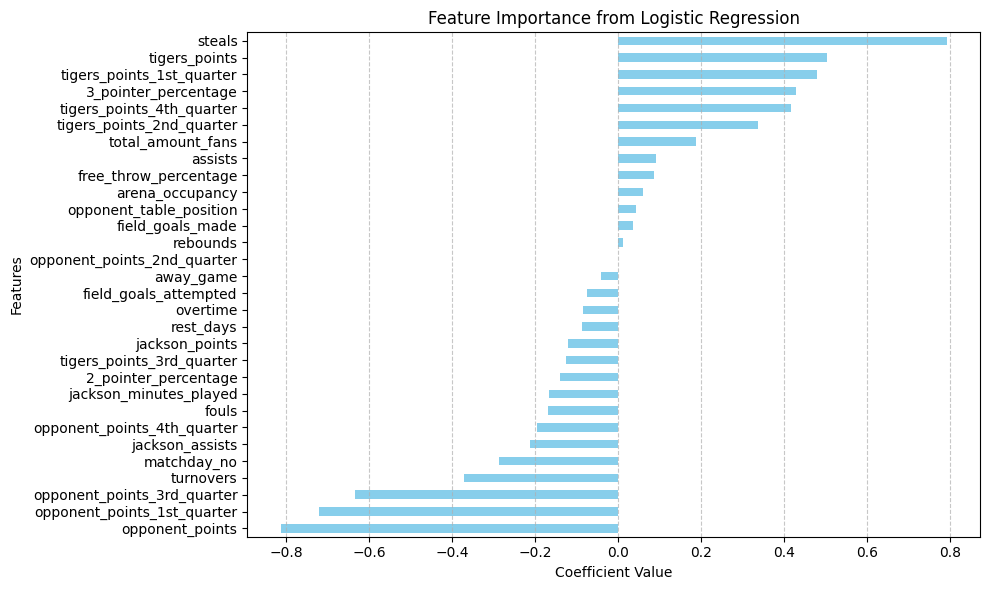

In [3]:
df = data
X = df.drop("tigers_win", axis=1)
y = df["tigers_win"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression to identify important features
model = LogisticRegression()
model.fit(X_scaled, y)

# Feature importance
importance = pd.Series(model.coef_[0], index=X.columns).sort_values()
print(importance)

plt.figure(figsize=(10, 6))
importance.plot(kind="barh", color="skyblue")
plt.title("Feature Importance from Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

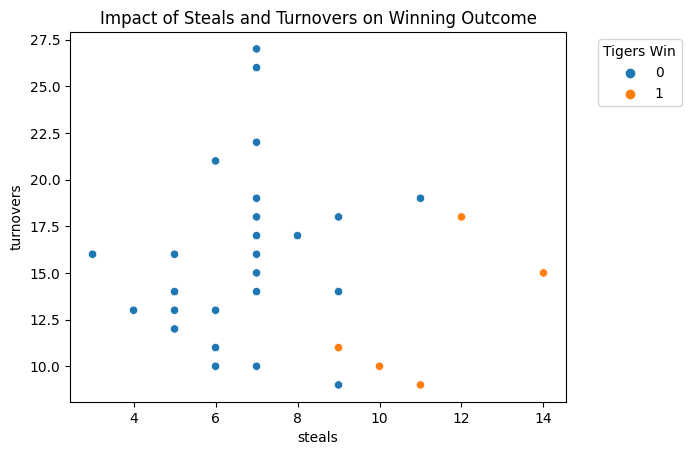

In [4]:
sns.scatterplot(data=data, x="steals", y="turnovers", hue="tigers_win")
plt.title("Impact of Steals and Turnovers on Winning Outcome")
plt.legend(title="Tigers Win", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Two features negatively correlating with the chance of Tübingen winning the game

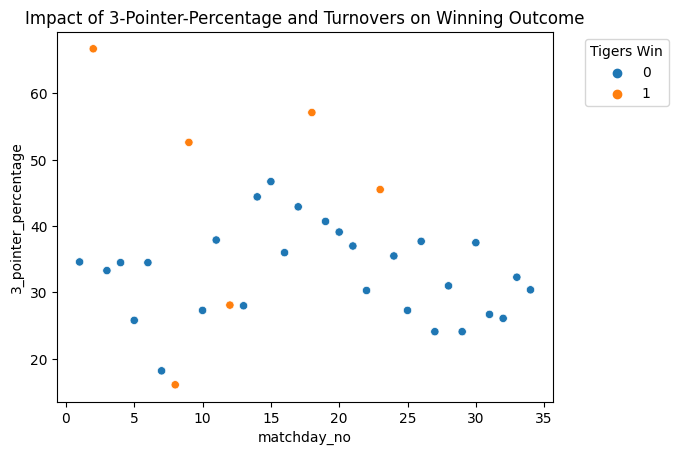

In [5]:
sns.scatterplot(data=data, x="matchday_no", y="3_pointer_percentage", hue="tigers_win")
plt.title("Impact of 3-Pointer-Percentage and Turnovers on Winning Outcome")
plt.legend(title="Tigers Win", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

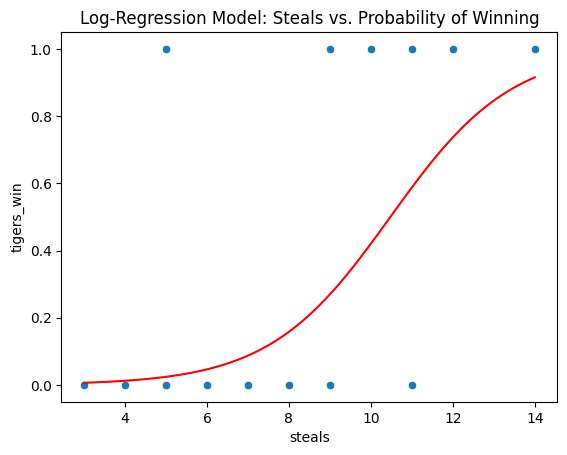

In [6]:
# 1D plot of steals and tigers win
# fit logistic regression model
feature = "steals"
feature_data_column = data[feature]
model = LogisticRegression()
model.fit(data[[feature]], data["tigers_win"])

# create a range for the decision boundary
x_range = np.linspace(feature_data_column.min(), feature_data_column.max(), 100)
x_range_df = pd.DataFrame({feature: x_range})  # Ensure feature names are included

# plot data and decision boundary
sns.scatterplot(data=data, x=feature, y="tigers_win")
sns.lineplot(x=x_range, y=model.predict_proba(x_range_df)[:, 1], color="red")
plt.title("Log-Regression Model: Steals vs. Probability of Winning")
plt.show()

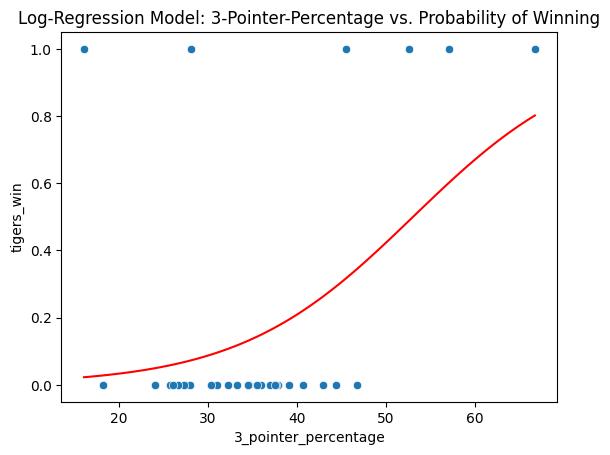

In [7]:
# 1D plot of 3-pointer percentage and tigers win
# fit logistic regression model
feature = "3_pointer_percentage"
feature_data_column = data[feature]
model = LogisticRegression()
model.fit(data[[feature]], data["tigers_win"])

# create a range for the decision boundary
x_range = np.linspace(feature_data_column.min(), feature_data_column.max(), 100)
x_range_df = pd.DataFrame({feature: x_range})  # Ensure feature names are included

# plot data and decision boundary
sns.scatterplot(data=data, x=feature, y="tigers_win")
sns.lineplot(x=x_range, y=model.predict_proba(x_range_df)[:, 1], color="red")
plt.title("Log-Regression Model: 3-Pointer-Percentage vs. Probability of Winning")
plt.show()